<a href="https://colab.research.google.com/github/noidokay/DeepLearning_NeuralNetwork/blob/main/CNN%20-%20Image%20classifier%20and%20prediction..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Unzipping the Intel Image dataset

In [ ]:
#Importing libraries for authentication

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile


!gdown --id 18YDOWhskcsayKxlSveNdtYSDo-eq4CGl

Downloading...
From: https://drive.google.com/uc?id=18YDOWhskcsayKxlSveNdtYSDo-eq4CGl
To: /content/intel_image.zip
363MB [00:08, 43.9MB/s]


In [ ]:
#Unzipping the files
!unzip intel_image.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
#importing library
import cv2
import pandas as pd
import numpy as np
import os
import glob

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer 
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
#primary use of tensor, but keeping keras file just in case

import keras
from keras import initializers
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img 
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from keras import models
from keras.models import load_model
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta, Nadam
!pip install keras-adabound
from keras_adabound import AdaBound
#from group_norm import GroupNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.np_utils import to_categorical
from PIL import Image, ImageFile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

1a) Represent classes in training validation.

{'buildings' -> 0, 'forest' -> 1, 'glacier' -> 2, 'mountain' -> 3, 'sea' -> 4, 'street' -> 5 } as provided in dataset

In [ ]:
#get images and label from file
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [ ]:
#Preprocessing: Get training images and label from seg_train file.
Images, y_Labels = get_images('/content/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(y_Labels)

#Get test images and labels
test_images,test_labels = get_images('/content/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
#Preprocessing: Number of Images in training dataset of each class
num_of_images = {}

train_dir = "/content/seg_train/seg_train/"

for class_name in os.listdir(train_dir):
    num_of_images[class_name] = len(os.listdir(train_dir+ '/' + class_name + '/'))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(num_of_images.values(), index=num_of_images.keys(), columns=["no. of images"])
img_per_class


,no. of images
street,2382
mountain,2512
glacier,2404
buildings,2191
sea,2274
forest,2271


6


Text(0.5, 1.0, 'Images per each class :')

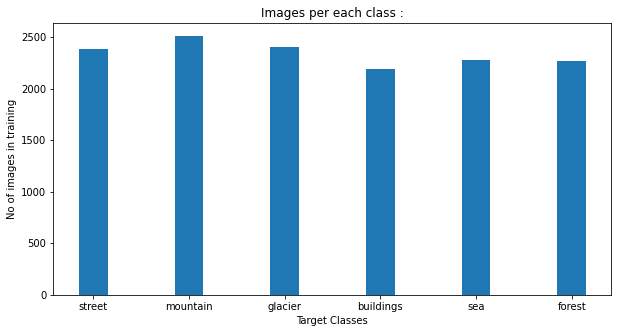

In [ ]:
#Preprocessing:  plotting number of images available for each structure in training dataset

index = [a for a in num_of_images.keys()]          #list of all labels
classes = [n for n in num_of_images.values()]
print(len(index))
plt.figure(figsize=(10, 5))
plt.bar(index, classes , width=0.3)
plt.xlabel('Target Classes', fontsize=10)
plt.ylabel('No of images in training', fontsize=10)
plt.title('Images per each class :')


Number of Samples Training:  9823
Number of Samples Validation:  4211
Number of Samples Test:  3000


Text(0.5, 1.0, 'Number of Samples')

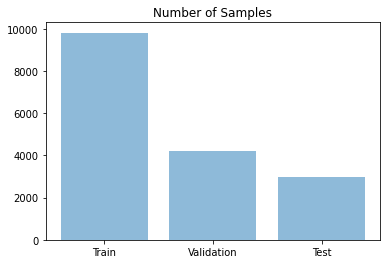

In [ ]:
#Preprocesssing: plotting and text for both testing and validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train = Images
Y_train = Labels


#forgot to mention y_test as test_labels
y_test = test_labels

#==========This part is used in model 3===================
y_cat = to_categorical(y_Labels, len(index)) #index is the unique class labels

X_train, X_val, y_train, y_val = train_test_split(X_train, y_cat, test_size=0.3)

X_train = X_train.astype('float32') / 255.0
X_test = test_images.astype('float32')/255.0
X_val = X_val.astype('float32') / 255.0
#==========================================

#test hasnt been implemented yet.
objects = ('Train', 'Validation', 'Test')
y_pos = np.arange(len(objects))
samples = []

samples.append(len(X_train))
samples.append(len(X_val))
samples.append(len(X_test))

print("Number of Samples Training: ", samples[0])
print("Number of Samples Validation: ", samples[1])
print("Number of Samples Test: ", samples[2])

plt.bar(y_pos, samples, align = 'center', alpha =0.5)
plt.xticks(y_pos, objects)
plt.title('Number of Samples')

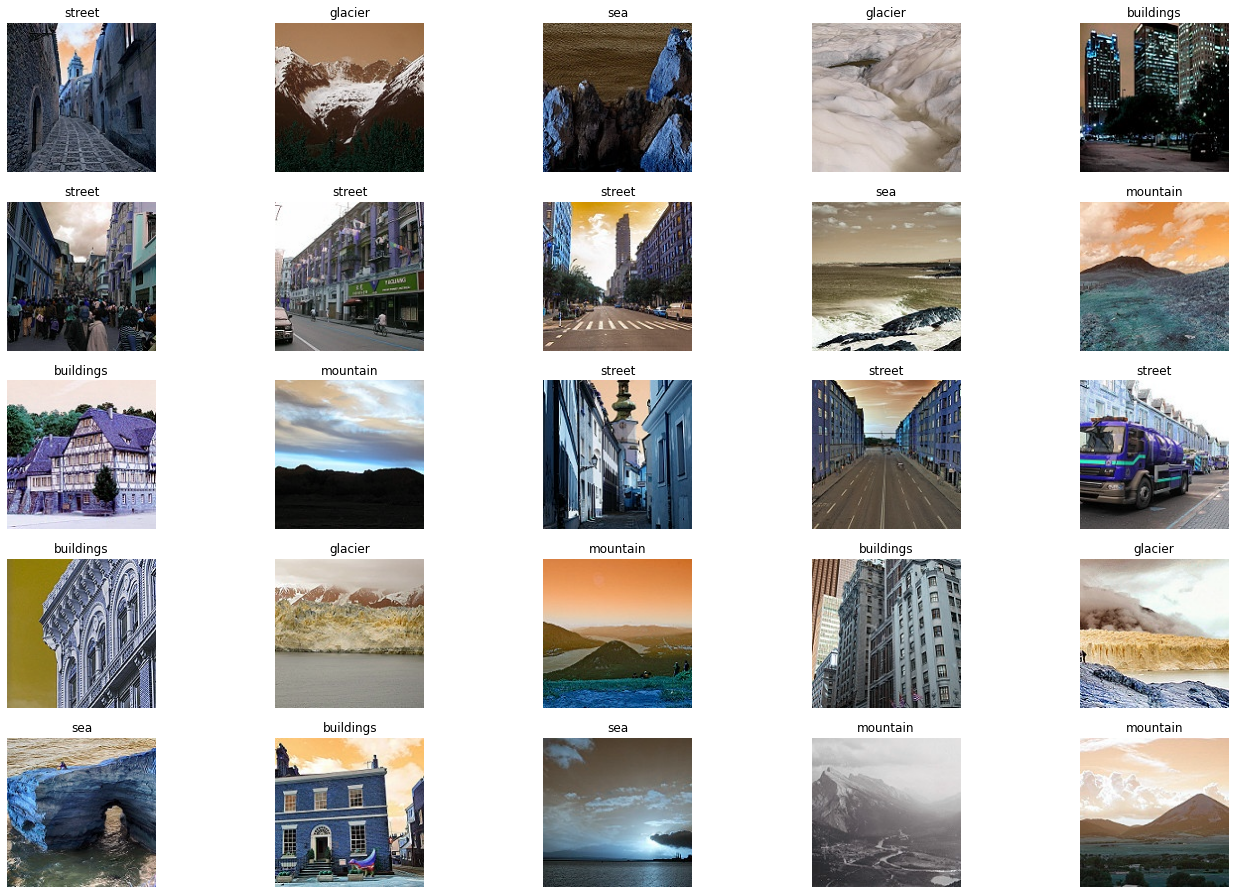

In [ ]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

1b) Create 3 different models

NOTE: DO NOT RUN MODELS UNLESS YOU MADE SIGNIFICANT CHANGES. IT TAKES TIME TO COMPLETE<br>
Model 1<br>
Convolution layer: 5(count), activation = 'relu'<br>
Batch Normalization: Disabled<br>
Pooling : maxpooling<br>
Fully Connected Layer: 5(count), activation = 'relu'<br>
Dropout rate: 50%<br>
Optimizer: Adam<br>
Learning rate: 0.0001<br>

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 180)     5040      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 140)     226940    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 140)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 100)       126100    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 80)        72080     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 23, 23, 50)        36050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 50)         

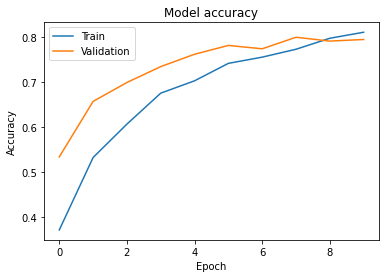

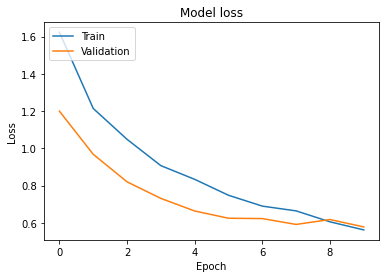

94/94 [==============================] - 3s 37ms/step - loss: 0.5416 - accuracy: 0.8177


[0.5416491031646729, 0.8176666498184204]

In [ ]:
model = Models.Sequential()

model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(80,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

trained1 = model.fit(Images,Labels,epochs=10,validation_split=0.20)

plt.plot(trained1.history['accuracy'])
plt.plot(trained1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(trained1.history['loss'])
plt.plot(trained1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

model.evaluate(test_images,test_labels, verbose=1)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plt.title('Prediction of Boats')
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues")

###==================================================== <br>
Model 2<br>
Convolution layer: 5(count), activation = 'relu'<br>
Batch Normalization: Enabled<br>
Pooling : maxpooling<br>
Fully Connected Layer: 5(count), activation = 'relu'<br>
Dropout rate: 0%<br>
Optimizer: Adam<br>
Learning rate: 0.0001<br>

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 180)     5040      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 146, 146, 140)     226940    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 140)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27, 100)       126100    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 80)        72080     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 23, 23, 50)        36050     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 50)         

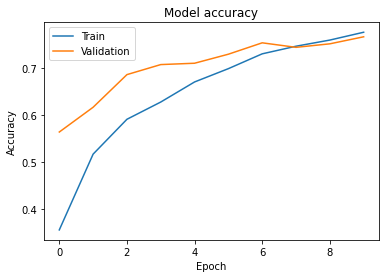

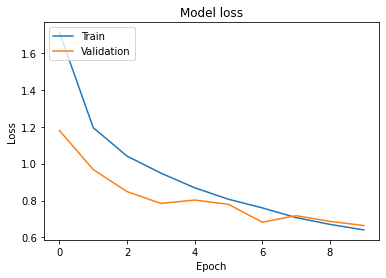

94/94 [==============================] - 2s 25ms/step - loss: 0.6370 - accuracy: 0.7700


[0.6370070576667786, 0.7699999809265137]

In [ ]:
model2 = Models.Sequential()

model2.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model2.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model2.add(Layers.MaxPool2D(5,5))
model2.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model2.add(Layers.Conv2D(80,kernel_size=(3,3),activation='relu'))
model2.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model2.add(Layers.MaxPool2D(5,5))
model2.add(Layers.Flatten())
model2.add(Layers.Dense(180,activation='relu'))
model2.add(Layers.Dense(100,activation='relu'))
model2.add(Layers.Dense(50,activation='relu'))
model2.add(Layers.Dropout(rate=0.5))
model2.add(Layers.Dense(6,activation='softmax'))

model2.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model2.summary()
SVG(model_to_dot(model2).create(prog='dot', format='svg'))
Utils.plot_model(model2,to_file='model.png',show_shapes=True)

trained2 = model2.fit(Images,Labels,epochs=10,validation_split=0.20, batch_size=64)

plt.plot(trained2.history['accuracy'])
plt.plot(trained2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(trained2.history['loss'])
plt.plot(trained2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

model2.evaluate(test_images,test_labels, verbose=1)

###==================================================== <br>
Model 3<br>
Convolution layer: 5(count), activation = 'Leakyrelu'<br>
Batch Normalization: Enabled<br>
Pooling : maxpooling<br>
Fully Connected Layer: 5(count), activation = 'relu'<br>
Dropout rate: 20%<br>
Optimizer: Nadam<br>
Learning rate: 0.0001<br>
beta_1=0.9,<br>
beta_2=0.999, <br>
epsilon=1e-07

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 180)     5040      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 146, 146, 140)     226940    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 140)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 27, 27, 100)       126100    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 25, 25, 80)        72080     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 23, 23, 50)        36050     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 50)         

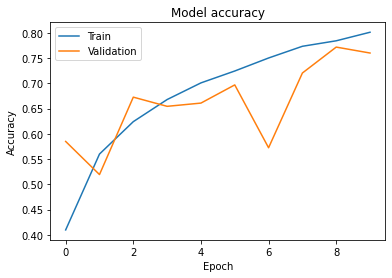

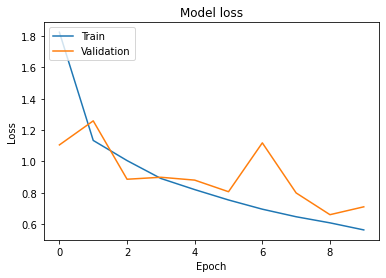

94/94 [==============================] - 4s 37ms/step - loss: 0.6629 - accuracy: 0.7800


[0.6629037261009216, 0.7799999713897705]

In [ ]:
from keras.layers import Conv2D, LeakyReLU
model3 = Models.Sequential()

model3.add(Layers.Conv2D(180,kernel_size=(3,3),activation=LeakyReLU(),input_shape=(150,150,3)))
model3.add(Layers.Conv2D(140,kernel_size=(3,3),activation=LeakyReLU()))
model3.add(Layers.MaxPool2D(5,5))
model3.add(Layers.Conv2D(100,kernel_size=(3,3),activation=LeakyReLU()))
model3.add(Layers.Conv2D(80,kernel_size=(3,3),activation=LeakyReLU()))
model3.add(Layers.Conv2D(50,kernel_size=(3,3),activation=LeakyReLU()))
model3.add(Layers.MaxPool2D(5,5))
model3.add(Layers.Flatten())
model3.add(Layers.Dense(180,activation=LeakyReLU()))
model3.add(Layers.Dense(100,activation=LeakyReLU()))
model3.add(Layers.Dense(50,activation=LeakyReLU()))
model3.add(Layers.Dropout(rate=0.5))
model3.add(Layers.Dense(6,activation='softmax'))

model3.compile(optimizer=Optimizer.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model3.summary()
SVG(model_to_dot(model3).create(prog='dot', format='svg'))
Utils.plot_model(model3,to_file='model.png',show_shapes=True)

trained3 = model3.fit(Images,Labels,epochs=10,validation_split=0.20, batch_size=64)

plt.plot(trained3.history['accuracy'])
plt.plot(trained3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(trained3.history['loss'])
plt.plot(trained3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

model3.evaluate(test_images,test_labels, verbose=1)

1d) Display some channels in every intermediate activations and explain why this is useful.

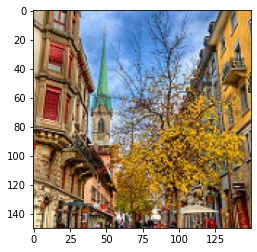

(1, 150, 150, 3)


In [ ]:
img_path = '/content/seg_pred/seg_pred/10004.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

(1, 148, 148, 180)


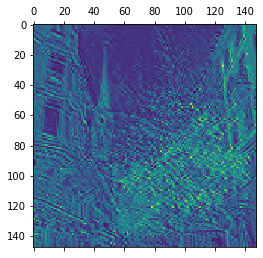

In [ ]:
layer_outputs = [layer.output for layer in model3.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model3.input, 
                                outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

conv2d_15 (3, 3, 3, 180)
conv2d_16 (3, 3, 180, 140)
conv2d_17 (3, 3, 140, 100)
conv2d_18 (3, 3, 100, 80)
conv2d_19 (3, 3, 80, 50)


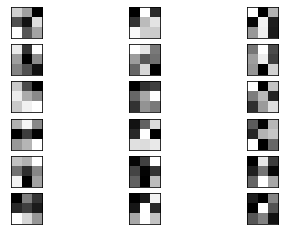

In [ ]:
for layer in model3.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
 

# retrieve weights from the second hidden layer
filters, biases = model3.layers[1].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

	
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

##==========Code for F1, ROC, Precision====================

In [ ]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(X_test, y_test, batch_size=64)

Model 1 confusion matrix

              precision    recall  f1-score   support

      street       0.00      0.00      0.00       437
    mountain       0.72      0.90      0.80       474
     glacier       0.00      0.00      0.00       553
   buildings       0.00      0.00      0.00       525
         sea       0.21      1.00      0.35       510
      forest       0.00      0.00      0.00       501

    accuracy                           0.31      3000
   macro avg       0.16      0.32      0.19      3000
weighted avg       0.15      0.31      0.19      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


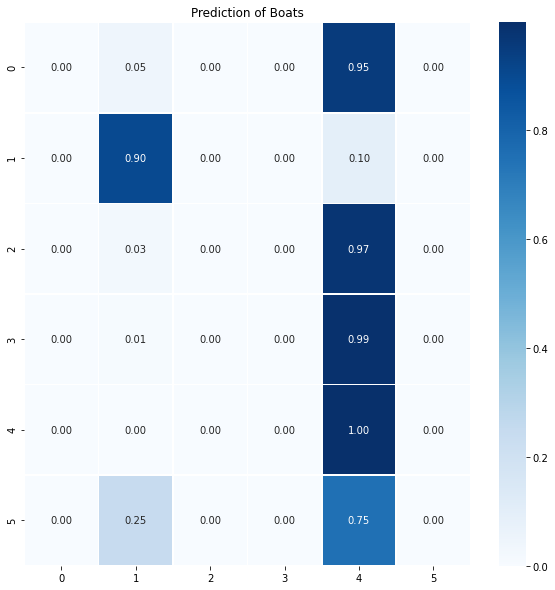

In [ ]:
y_img_batch, y_class_batch = test_generator[0]
for i in range(1,len(test_generator)):
  testX = test_generator[i][0]
  testY = test_generator[i][1]
  y_img_batch = np.concatenate((y_img_batch, testX)) 
  y_class_batch = np.concatenate((y_class_batch, testY))

y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = y_class_batch
print(classification_report(y_true, y_pred, target_names=index))

#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plt.title('Prediction of Boats')
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues")

Model 3 confusion matrix

              precision    recall  f1-score   support

      street       0.00      0.00      0.00       437
    mountain       0.64      0.93      0.76       474
     glacier       0.00      0.00      0.00       553
   buildings       0.00      0.00      0.00       525
         sea       0.22      1.00      0.36       510
      forest       0.00      0.00      0.00       501

    accuracy                           0.32      3000
   macro avg       0.14      0.32      0.19      3000
weighted avg       0.14      0.32      0.18      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


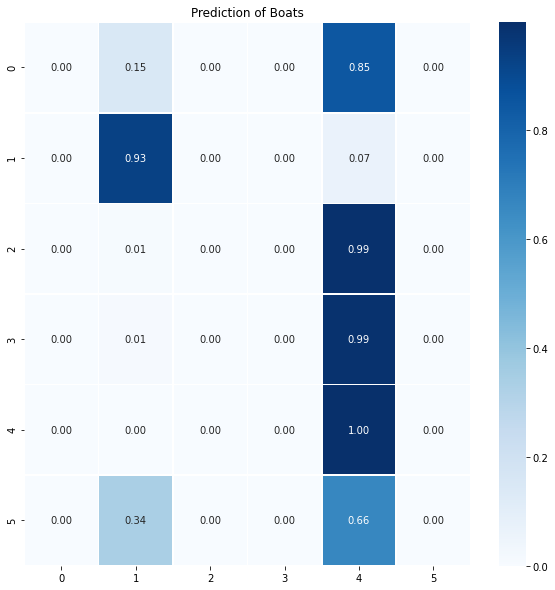

In [ ]:
y_img_batch, y_class_batch = test_generator[0]
for i in range(1,len(test_generator)):
  testX = test_generator[i][0]
  testY = test_generator[i][1]
  y_img_batch = np.concatenate((y_img_batch, testX)) 
  y_class_batch = np.concatenate((y_class_batch, testY))

y_pred = np.argmax(model3.predict(y_img_batch),-1)
y_true = y_class_batch
print(classification_report(y_true, y_pred, target_names=index))

#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plt.title('Prediction of Boats')
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues")

In [ ]:
from sklearn import preprocessing 
from scipy import interp
from itertools import cycle

n_classes = len(index)
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_true = lb.transform(y_true)
y_pred = lb.transform(y_pred)
lw = 5

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"): 
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classe s)]))
  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr) 
  for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(figsize=(21,21))
  plt.plot(fpr["micro"], tpr["micro"],
           label='micro-average ROC curve (area = {0:0.2f})' ''.format(roc_auc["micro"]),
           color='deeppink', linestyle=':', linewidth=lw)
  plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:0.2f})', ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=lw)
  colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])
  for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC and AUC Curve')
  plt.legend(loc="lower right")
  plt.show()
  return roc_auc_score(y_test, y_pred, average=average) 
print("ROC_AUC_Score:", multiclass_roc_auc_score(y_true, y_pred))